# Data wrangling with python and pandas

Read about Emblematic Online here: http://emblematica.grainger.illinois.edu

## Acknowledgements

**Many thanks to Mara Wade, Tim Cole, Myung-Ja Han, and the whole Emblematica Online team for providing access to this data**

## A. Introduction


* **Jupyter Notebooks** allow anyone to run **Python** code in any browser, without the need to use the terminal or command line

* **Jupyter Notebooks** are organized as 'cells', which can be **commentary** (like this one, which is static), or **code** (those below, which produce dyanmic output in the form of charts or tabular data frames.  

* To run an individual cell, use the **`arrow/run`** command at the top of the Notebook, or just press **`Shift + Enter`** on your keyboard.


### A.1 Import Libraries

Before we can do anything we need to import the python tools we need:

* **pandas** is the main library used for data wrangling
* **matplotlib** will help us render graphs and charts
* there are dozens of other standard libraries; if they work with Python, they will work with Jupyter and Pandas

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

### A.2  URLs of our Data Sets

In [8]:
emblematica_books = "https://raw.githubusercontent.com/RichardFreedman/DDL_2022_Pandas_Jupyter/main/data_files/bookObjects.csv"
emblematica_emblems = "https://raw.githubusercontent.com/RichardFreedman/DDL_2022_Pandas_Jupyter/main/data_files/emblemObjects.csv"

### A.3  Make a DataFrame

* The basic unit of work in Pandas is the DataFrame (a table representing the data as columns (with the headings from our CSV files) and rows.
* The left-hand column is called the `index`.  Here it's simply a number, but we can change that.  **NB**:  index starts at "0"!

**Create a DataFrame** by importing one of the CSV files.  We'll also give the frame a name (`books`):

In [9]:
books = pd.read_csv(emblematica_books)

### A.4 Inspect the DataFrame

Now we can look at the data in various ways to see what's here:

* `books.head()` shows us just the first five entries (for brevity).  
* We could also see `books.tail()`, or `books.sample(5)` to see a random sample of five.
* `books.shape` will tell us the size of our frame:  how many rows and columns



In [12]:
books.tail()

Book_ID                               URL_for_Book_Details  \
43  57042755X  http://emblematica.library.illinois.edu/detail...   
44  373960859  http://emblematica.library.illinois.edu/detail...   
45  379509814  http://emblematica.library.illinois.edu/detail...   
46  872516830  http://emblematica.library.illinois.edu/detail...   
47  537816240  http://emblematica.library.illinois.edu/detail...   

                                           Book_Title  Publication_Date  \
43  Aulæa Romana, Contra Peristromata Turcica Expa...              1642   
44  Geistliche Hertzens-Einbildungen Inn Zweihunde...              1692   
45  Iodoci Ammanni, Civis Noribergensis. Charta Lv...              1588   
46  Dreiständige Sinnbilder: Zu Fruchtbringendem N...              1643   
47  Fruchtbringenden Geselschaft Nahmen/ Vorhaben/...              1646   

   Publisher Place_of_Publication                       Author_1 Author_2  \
43    Endter             Nürnberg     Harsdörffer, Georg Philipp      NaN   
44  Bodenehr            Augstburg                            NaN      NaN   
45   Heußler             Nürnberg              Ammannus, Jodocus      NaN   
46      Buno         Braunschweig                   Geheime, Der      NaN   
47    Merian   Franckfurt am Mayn  Ludwig <Anhalt-Köthen, Fürst>      NaN   

   Author_3 Author_4 Author_5                         Contributor_1  \
43      NaN      NaN      NaN         Endter, Wolfgang <der Ältere>   
44      NaN      NaN      NaN        Melchior@Mattsperger, Melchior   
45      NaN      NaN      NaN           Schröterus, Janus Heinricus   
46      NaN      NaN      NaN  Nährende, Der <Anhalt-Köthen, Fürst>   
47      NaN      NaN      NaN         Merian, Matthäus <der Ältere>   

                     Contributor_2           Contributor_3  
43                             NaN                     NaN  
44           Bodenehr, Hannß Georg  Bodenehr, Johann Georg  
45               Heußler, Leonhard                     NaN  
46              Unverdrossene, Der           Suchende, Der  
47  Merian, Matthaeus <der Ältere>                     NaN

Overall size of our dataframe:

In [16]:
books.shape

(48, 14)

#### We found some duplicate books, so let's drop one of those

In [17]:
books = books.drop_duplicates()
books.shape

(47, 14)

## B. Working with Column Data

### B.1 Get Columns and Values

* We now start to look more closely at the columns
* `books.columns` will give us a list of the column names
* `books.columns.sort_values()` will sort these
* Select one column:  `books["Place_of_Publication"]`
* Count the number of unique values: `books["Place_of_Publication"].nunique()`
* Count the number of entries for each value:  `books["Place_of_Publication"].value_counts()`

#### We can list out the columns like this:

In [18]:
books.columns

Index(['Book_ID', 'URL_for_Book_Details', 'Book_Title', 'Publication_Date',
       'Publisher', 'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3',
       'Author_4', 'Author_5', 'Contributor_1', 'Contributor_2',
       'Contributor_3'],
      dtype='object')

#### And put them in alphabetical order

In [19]:
books.columns.sort_values()

Index(['Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5', 'Book_ID',
       'Book_Title', 'Contributor_1', 'Contributor_2', 'Contributor_3',
       'Place_of_Publication', 'Publication_Date', 'Publisher',
       'URL_for_Book_Details'],
      dtype='object')

#### An individual column is represented as a "Series"

In [20]:
books["Place_of_Publication"]

0                          Nurembergµ
1                           Osnabrugi
2                             Lovanii
3                             A Paris
4                            Augspurg
5               Francofurti ad Moenum
6                          Nuremberg?
7                            Bononiae
8                            Nürnberg
9                         Francofurti
10                         Heidelberg
11                           Augspurg
13                           Augspurg
14                          Saltzburg
15                        Heidelbergæ
16                             London
17                           Coloniae
18                          Bruxellae
19                             Leiden
20                          Amsterdam
21                            Lugduni
22                               Lyon
23    Impresso en la ciudad de Najera
24                            Patauij
25       Excvsvm Avgvstæ Vindelicorum
26       Excvsvm Avgvstæ Vindelicorum
27      Excv

In [21]:
books["Place_of_Publication"].nunique()

39

#### We get a count of the places of publication as follows. Note, however, the subtle orthographical differences:

In [22]:
books["Place_of_Publication"].value_counts()

Augspurg                           3
Nürnberg                           3
Excvsvm Avgvstæ Vindelicorum       2
A Lyon                             2
Parisiis                           2
Lvgd                               2
Excvsvm Avgvstae Vindelicorum      1
On les vend a Paris                1
On les uend à Paris                1
En Lyon                            1
Lvgdvni                            1
Nurembergµ                         1
Patauij                            1
Lvgdvni Batavorvm                  1
In Lione                           1
Paris                              1
A Cologny                          1
Augstburg                          1
Braunschweig                       1
Gedruckt zu Franckfurt am Mayn     1
Lyon                               1
Impresso en la ciudad de Najera    1
Osnabrugi                          1
Lovanii                            1
A Paris                            1
Francofurti ad Moenum              1
Nuremberg?                         1
B

___

### B.2  What about all those Author columns?

* Notice that in the *Emblematica* data that an individual book can have more than one author.  Each is in a different column


In [23]:
books.head()

Book_ID                               URL_for_Book_Details  \
0   emblematapolitic00isel  http://emblematica.library.illinois.edu/detail...   
1                645803367  http://emblematica.library.illinois.edu/detail...   
2                635971542  http://emblematica.library.illinois.edu/detail...   
3  devisesheroiques00parad  http://emblematica.library.illinois.edu/detail...   
4                386577072  http://emblematica.library.illinois.edu/detail...   

                                          Book_Title  Publication_Date  \
0  Emblemata politica: in aula magna Curiµ Norinb...              1617   
1  Iter parallelum Phoebi Occidentis & Orientis J...              1680   
2                    Annvs Positionvm Mathematicarvm              1641   
3                     Devises heroiques, et emblemes              1614   
4  Kunst-Göttin Minerva Liebreiche Entdeckung/ Wi...              1704   

                   Publisher Place_of_Publication  \
0                        NaN           Nurembergµ   
1                Schwänderus            Osnabrugi   
2  Collegium Societatis Jesu              Lovanii   
3       Chez Jean Millot ...              A Paris   
4                  Kröninger             Augspurg   

                             Author_1  \
0  Iselberg, Peter, ca. 1568-ca. 1630   
1                                 NaN   
2                   Ciermans, Joannes   
3          Paradin, Claude, 16th cent   
4                        Ripa, Cesare   

                                            Author_2 Author_3 Author_4  \
0                            Remus, Georg, 1561-1625      NaN      NaN   
1                                                NaN      NaN      NaN   
2  Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...      NaN      NaN   
3                   Amboise, Franðcois d', 1550-1620      NaN      NaN   
4                                                NaN      NaN      NaN   

  Author_5                                     Contributor_1  \
0      NaN                                               NaN   
1      NaN  Johann Friedrich <Braunschweig-Lüneburg, Herzog>   
2      NaN                       Ferdinandus <Imperator, II>   
3      NaN                                               NaN   
4      NaN                                  Kroniger, Lorenz   

                           Contributor_2     Contributor_3  
0                                    NaN               NaN  
1  Ernst August <Hannover, Kurfürst, I.>  Löffler <Junior>  
2                       Mandekens, Mart.   Neeffs, Jacobus  
3                                    NaN               NaN  
4                   Gottlieb Göbel Erben               NaN

#### Using Python's capacity to understand `lists`, we can find just these columns:

In [24]:
author_columns = [c for c in books.columns if c.startswith("Author")]
author_columns

['Author_1', 'Author_2', 'Author_3', 'Author_4', 'Author_5']

In [25]:
books[author_columns].head()

Author_1  \
0  Iselberg, Peter, ca. 1568-ca. 1630   
1                                 NaN   
2                   Ciermans, Joannes   
3          Paradin, Claude, 16th cent   
4                        Ripa, Cesare   

                                            Author_2 Author_3 Author_4  \
0                            Remus, Georg, 1561-1625      NaN      NaN   
1                                                NaN      NaN      NaN   
2  Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...      NaN      NaN   
3                   Amboise, Franðcois d', 1550-1620      NaN      NaN   
4                                                NaN      NaN      NaN   

  Author_5  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

#### And now 'stack' the values for all these columns into one **Series**

In [28]:
books[author_columns].stack()

0   Author_1                   Iselberg, Peter, ca. 1568-ca. 1630
    Author_2                              Remus, Georg, 1561-1625
2   Author_1                                    Ciermans, Joannes
    Author_2    Unverzagt de Ebenfurt, Wolfgangus Philippus Ja...
3   Author_1                           Paradin, Claude, 16th cent
                                      ...                        
42  Author_4               Tournes, Jean de, II, active 1568-1584
43  Author_1                           Harsdörffer, Georg Philipp
45  Author_1                                    Ammannus, Jodocus
46  Author_1                                         Geheime, Der
47  Author_1                        Ludwig <Anhalt-Köthen, Fürst>
Length: 72, dtype: object

#### And count the items in the stacked set

In [29]:
books[author_columns].stack().value_counts()

Alciati, Andrea, 1492-1550                              21
Aneau, Barthélemy, -1561                                 4
Lefèvre, Jean, 1493-1565                                3
Breu, Jörg, approximately 1480-1537                      3
Mignault, Claude, approximately 1536-1606                2
Stockhammer, Sebastian, sec. XVI                         2
Weiditz, Hans, approximately 1495-approximately 1536     2
López, Diego, ?-1655                                     1
Thuilius, Joannes.                                       1
Pignoria, Lorenzo, 1571-1631                             1
Morel, Fédéric, approximately 1552-1630                1
Iselberg, Peter, ca. 1568-ca. 1630                       1
Remus, Georg, 1561-1625                                  1
Daza Pinciano, Bernardino.                               1
Held, Jeremias.                                          1
Marquale, Giovanni.                                      1
Tournes, Jean de, II, active 1568-1584                   1


#### All the authors, sorted alphbetically as a list

In [30]:
sorted(books[author_columns].stack().unique())

['Alciati, Andrea, 1492-1550',
 "Amboise, Franðcois d', 1550-1620",
 'Ammannus, Jodocus',
 'Aneau, Barthélemy, -1561',
 'Astry, James, Sir',
 'Batillius, Dionysius Lebeus',
 'Breu, Jörg, approximately 1480-1537',
 'Camerarius, Joachim',
 'Ciermans, Joannes',
 'Cremcovius, Valens.',
 'Daza Pinciano, Bernardino.',
 'Elger, Willem den',
 'Feuille, Daniel de la',
 'Geheime, Der',
 'Harsdörffer, Georg Philipp',
 'Held, Jeremias.',
 'Hunger, Wolffgang, 1511-1555',
 'Iselberg, Peter, ca. 1568-ca. 1630',
 'Lefèvre, Jean, 1493-1565',
 'Ludwig <Anhalt-Köthen, Fürst>',
 'López, Diego, ?-1655',
 'Maccius, Paulus',
 'Marquale, Giovanni.',
 'Meisner, Daniel',
 'Mignault, Claude, approximately 1536-1606',
 'Morel, Fédéric, approximately 1552-1630',
 'Ovidius Naso, Publius',
 'Paradin, Claude, 16th cent',
 'Pignoria, Lorenzo, 1571-1631',
 'Remus, Georg, 1561-1625',
 'Ripa, Cesare',
 'Rollenhagen, Gabriel, 1583-1619?',
 'Saavedra-Fajardo, Diego de, 1584-1648',
 'Stockhammer, Sebastian, sec. XVI',
 'Thu

### B.3 See if you can get a list of contributors 

It is very similar to the process above:

In [31]:
books.columns

Index(['Book_ID', 'URL_for_Book_Details', 'Book_Title', 'Publication_Date',
       'Publisher', 'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3',
       'Author_4', 'Author_5', 'Contributor_1', 'Contributor_2',
       'Contributor_3'],
      dtype='object')

___

## C.  Charts and Graphs

* Through libraries like **matplotlib**, Pandas can quickly produce histograms, charts, and graphs of various kinds (these can even be saved as PNG files for publications)

In [32]:
books["Publication_Date"].sort_values()

26    1531
25    1531
28    1534
27    1534
40    1536
29    1539
30    1542
31    1542
41    1549
32    1549
33    1550
39    1551
34    1551
22    1552
21    1552
35    1556
36    1558
37    1566
45    1588
38    1591
5     1596
10    1605
17    1611
9     1614
3     1614
23    1615
42    1615
0     1617
24    1621
18    1624
7     1628
2     1641
43    1642
46    1643
47    1646
15    1666
1     1680
14    1685
20    1691
44    1692
13    1695
11    1695
6     1700
16    1700
8     1700
19    1703
4     1704
Name: Publication_Date, dtype: int64

#### Here we create histograms of the distribution of the years of publication, and sort them into however many 'bins' we like

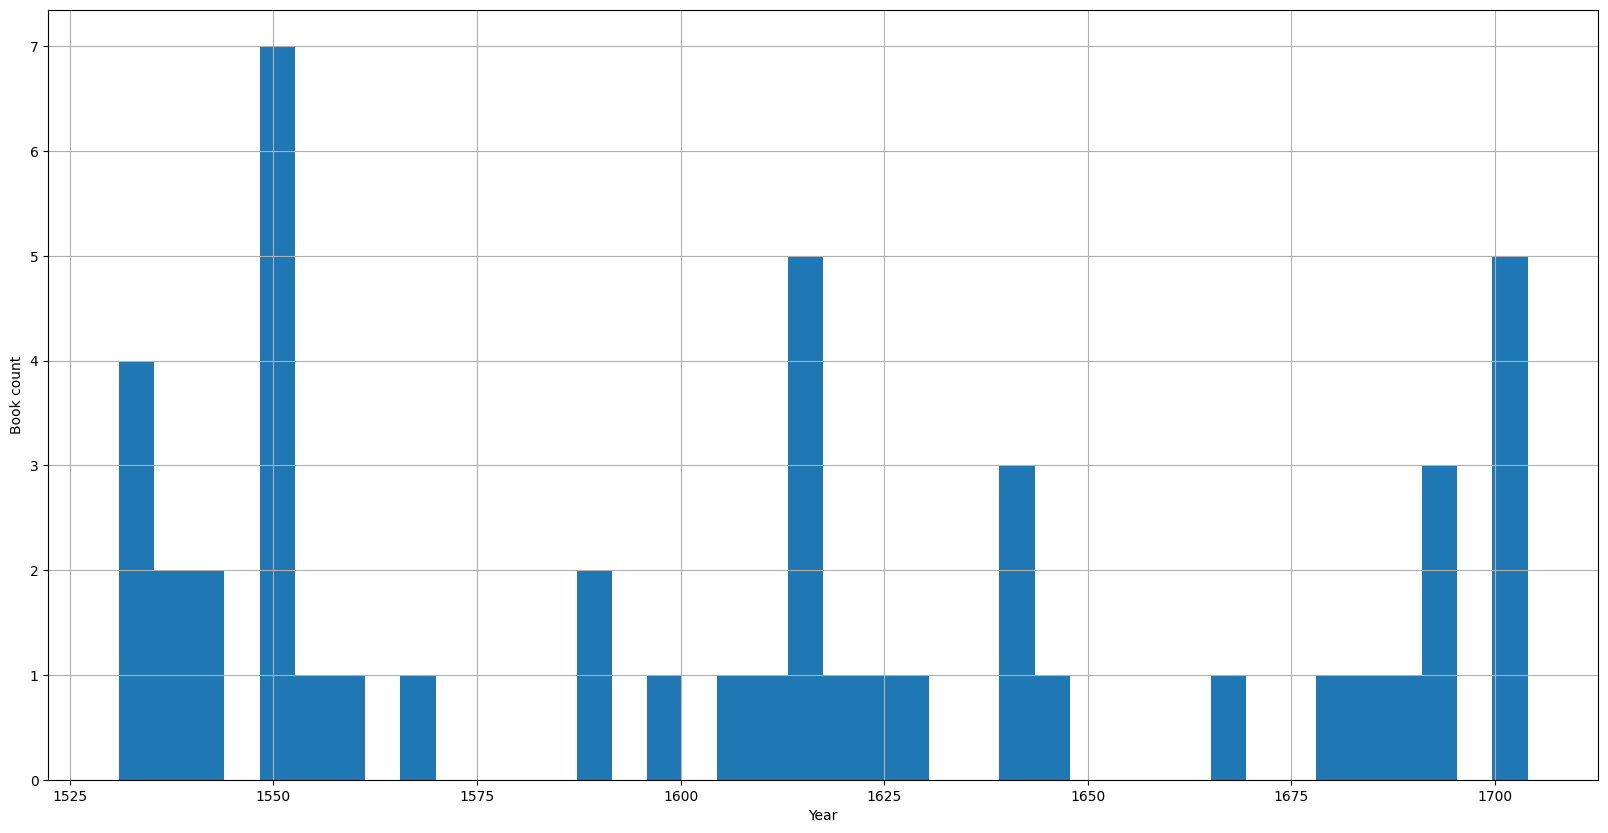

In [33]:
books["Publication_Date"].hist(figsize=(20, 10), bins=40)
plt.xlabel("Year")
plt.ylabel("Book count")
plt.show()

#### Various built-in math functions allow us to run basic statistics.  Libraries like `numpy` permit many more!

In [34]:
books.Publication_Date.mean()

1609.468085106383

___

## D.  More Work with Columns

### D.1 Load the Emblem CSV

In [35]:
emblems = pd.read_csv(emblematica_emblems)

In [36]:
emblems.sample(5)

Emblem_ID                             URL_for_Emblem_Details  \
62   E029396  http://emblematica.library.illinois.edu/detail...   
6    E003758  http://emblematica.library.illinois.edu/detail...   
71   E029823  http://emblematica.library.illinois.edu/detail...   
22   E010937  http://emblematica.library.illinois.edu/detail...   
81   E030671  http://emblematica.library.illinois.edu/detail...   

                             URL_for_Emblem_Thumbnail  \
62  http://emblemimages.library.illinois.edu/A21a/...   
6   http://emblemimages.library.illinois.edu/63597...   
71  http://emblemimages.library.illinois.edu/A34b/...   
22  http://emblemimages.library.illinois.edu/65900...   
81  http://emblemimages.library.illinois.edu/A50a/...   

                Emblem_Motto  Publication_Date  \
62                      Pax.              1621   
6   Iunii. Hebdomas Secunda.              1641   
71                      Pax.              1534   
22      Dum Non Collidamini.              1700   
81             Ex bello pax.              1550   

                                      URL_for_Pictura  \
62  http://emblemimages.library.illinois.edu/A21a/...   
6   http://emblemimages.library.illinois.edu/63597...   
71  http://emblemimages.library.illinois.edu/A34b/...   
22  http://emblemimages.library.illinois.edu/65900...   
81  http://emblemimages.library.illinois.edu/A50a/...   

                                  Iconclass_Heading_1  \
62         23S14 Rome (one of the four world empires)   
6   86(IUNII. HEBDOMAS SECUNDA) proverbs, sayings,...   
71   11A Deity, God (in general) ~ Christian religion   
22  86(DUM NON COLLIDAMINI) proverbs, sayings, etc...   
81  25F711(BEE)(+53) insects: bee (+ postures, pos...   

                                  Iconclass_Heading_2  \
62  25F(+5227) animals (+ animal trampling, treadi...   
6   92D19164 cupids together with attributes of th...   
71         23S14 Rome (one of the four world empires)   
22                25I1 city-view in general; 'veduta'   
81                     25G13 groups of plants (herbs)   

                                  Iconclass_Heading_3  \
62  25F25(ELEPHANT)(+81) trunked animals: elephant...   
6                 45C11(SLING) casting weapons: sling   
71  25F25(ELEPHANT)(+81) trunked animals: elephant...   
22  61E(BUARCOS) names of cities and villages (BUA...   
81                             25H1124 boulder, stone   

                                  Iconclass_Heading_4  \
62                            25H114 low hill country   
6                            45A144 war and technique   
71                                         25G3 trees   
22  41A773 container of ceramics: jar, jug, pot, vase   
81                                 25H113 (high) hill   

                                  Iconclass_Heading_5  \
62                                         26A clouds   
6   45A10 symbols, allegories of war; 'Guerra' (Ripa)   
71                                    43A festivities   
22               31A2774 floating (movement in water)   
81                                     31A22611 blood   

                                  Iconclass_Heading_6  \
62  31A2513(+933) arm stretched sidewards (+ holdi...   
6                         23I23 June; 'Giugno' (Ripa)   
71  43A(+21) festivities (+ decorated float, wagon...   
22  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
81                                           45A1 war   

                                  Iconclass_Heading_7  From Collection  \
62                                    31D14 adult man              NaN   
6                                                 NaN              NaN   
71  45A10 symbols, allegories of war; 'Guerra' (Ripa)              NaN   
22          54BB31 Damage, Disservice; 'Danno' (Ripa)              NaN   
81  45A10 symbols, allegories of war; 'Guerra' (Ripa)              NaN   

   Published_In                               URL_for_Book_Details  
62         A21a  http://emblematica.libra

### D.2  Dropping Columns

* The *From Collection* column is completely empty (see the `NaN` values), so how about we drop it from our DataFrame. 
* We will also drop the **URL** columns to reduce the size of the DataFrame.



In [39]:
emblems = emblems.drop(columns=["From Collection", "URL_for_Emblem_Details", "URL_for_Emblem_Thumbnail", "URL_for_Pictura"])
emblems.head()

Emblem_ID              Emblem_Motto  Publication_Date  \
0   E000913  In pace quae belli sunt.              1617   
1   E003060   Erigit impavidum ruina.              1680   
2   E003754     Maii. Hebdomas Prima.              1641   
3   E003755   Maii. Hebdomas Secunda.              1641   
4   E003756    Maii. Hebdomas Tertia.              1641   

                                 Iconclass_Heading_1  \
0  25F23(FOX)(+535) beasts of prey, predatory ani...   
1  86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings, ...   
2  86(MAII. HEBDOMAS PRIMA) proverbs, sayings, et...   
3  86(MAII. HEBDOMAS SECUNDA) proverbs, sayings, ...   
4  86(MAII. HEBDOMAS TERTIA) proverbs, sayings, e...   

                                 Iconclass_Heading_2  \
0  25F24(BOAR)(+5211) hoofed animals: boar (+ wal...   
1  54F12 Luck, Fortune, Lot; 'Fato', 'Fortuna', '...   
2      92D1916 cupids: 'amores', 'amoretti', 'putti'   
3      92D1916 cupids: 'amores', 'amoretti', 'putti'   
4      92D1916 cupids: 'amores', 'amoretti', 'putti'   

                                 Iconclass_Heading_3  \
0                                         25G3 trees   
1  46C1442 four-wheeled vehicle drawn by two animals   
2                                  41A1911 tent-camp   
3  46C13187 leading a horse by the reins; rider b...   
4                                  49D5111 compasses   

                                 Iconclass_Heading_4  \
0  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
1  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
2  47D8(HAMMER) tools, aids, implements ~ crafts ...   
3                                       45C22 armour   
4           49D511(RULER) drawing-instruments: ruler   

                                 Iconclass_Heading_5  \
0  45A20 symbols, allegories of peace, 'Pax'; 'Pa...   
1           33A12 shaking hands, 'dextrarum junctio'   
2                47C41 gripping (industrial process)   
3                                        45H3 battle   
4                               45F11 plan of battle   

                                 Iconclass_Heading_6  \
0                         45A132 preparation for war   
1                                    31D14 adult man   
2  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
3                                33B10 'Lite' (Ripa)   
4  45A10 symbols, allegories of war; 'Guerra' (Ripa)   

                                 Iconclass_Heading_7            Published_In  \
0  54D1(+4) Preparation (+ emblematical represent...  emblematapolitic00isel   
1                                     46C13141 horse               645803367   
2                         23I22 May; 'Maggio' (Ripa)               635971542   
3  45A10 symbols, allegories of war; 'Guerra' (Ripa)               635971542   
4                                33B10 'Lite' (Ripa)               635971542   

                                URL_for_Book_Details  
0  http://emblematica.library.illinois.edu/detail...  
1  http://emblematica.library.illinois.edu/detail...  
2  http://emblematica.library.illinois.edu/detail...  
3  http://emblematica.library.illinois.edu/detail...  
4  http://emblematica.library.illinois.edu/detail...

### D.3 Exploring the IconClass Data:  Combining the Tags

* Emblematica Online uses the Iconclass vocabularies to classify the images.
* Each emblem can have more than one classification number, and these are stored in separate columns
* Let's: 
 - **find those Iconclass columns** and then 
 - **remove the NaN values** in any cells and then
 - put all the values for each icon in a single cell **'iconclasses'**

 #### More about [Iconclasses](http://www.iconclass.org/help/outline)

In [40]:
icon_columns = [c for c in emblems.columns if c.startswith("Iconclass")]
icon_columns

['Iconclass_Heading_1',
 'Iconclass_Heading_2',
 'Iconclass_Heading_3',
 'Iconclass_Heading_4',
 'Iconclass_Heading_5',
 'Iconclass_Heading_6',
 'Iconclass_Heading_7']

In [41]:
emblems["iconclasses"] = (
    emblems[icon_columns]
        .fillna("")
        .apply(lambda x: [el for el in x if el], axis="columns")
)
emblems["iconclasses"]

0      [25F23(FOX)(+535) beasts of prey, predatory an...
1      [86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings,...
2      [86(MAII. HEBDOMAS PRIMA) proverbs, sayings, e...
3      [86(MAII. HEBDOMAS SECUNDA) proverbs, sayings,...
4      [86(MAII. HEBDOMAS TERTIA) proverbs, sayings, ...
                             ...                        
108    [86(WER DIESES NIMT IN ACHT) proverbs, sayings...
109    [86(DEN MUND SCHLEUS ZU) proverbs, sayings, et...
110    [86(FRIED UNS ERHELT) proverbs, sayings, etc. ...
111    [86(SO RÜST' ICH MICH) proverbs, sayings, etc....
112    [86(DER DREYEN EINES., DER BEDEUTENDE) proverb...
Name: iconclasses, Length: 113, dtype: object

In [42]:
emblems.head()

Emblem_ID              Emblem_Motto  Publication_Date  \
0   E000913  In pace quae belli sunt.              1617   
1   E003060   Erigit impavidum ruina.              1680   
2   E003754     Maii. Hebdomas Prima.              1641   
3   E003755   Maii. Hebdomas Secunda.              1641   
4   E003756    Maii. Hebdomas Tertia.              1641   

                                 Iconclass_Heading_1  \
0  25F23(FOX)(+535) beasts of prey, predatory ani...   
1  86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings, ...   
2  86(MAII. HEBDOMAS PRIMA) proverbs, sayings, et...   
3  86(MAII. HEBDOMAS SECUNDA) proverbs, sayings, ...   
4  86(MAII. HEBDOMAS TERTIA) proverbs, sayings, e...   

                                 Iconclass_Heading_2  \
0  25F24(BOAR)(+5211) hoofed animals: boar (+ wal...   
1  54F12 Luck, Fortune, Lot; 'Fato', 'Fortuna', '...   
2      92D1916 cupids: 'amores', 'amoretti', 'putti'   
3      92D1916 cupids: 'amores', 'amoretti', 'putti'   
4      92D1916 cupids: 'amores', 'amoretti', 'putti'   

                                 Iconclass_Heading_3  \
0                                         25G3 trees   
1  46C1442 four-wheeled vehicle drawn by two animals   
2                                  41A1911 tent-camp   
3  46C13187 leading a horse by the reins; rider b...   
4                                  49D5111 compasses   

                                 Iconclass_Heading_4  \
0  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
1  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
2  47D8(HAMMER) tools, aids, implements ~ crafts ...   
3                                       45C22 armour   
4           49D511(RULER) drawing-instruments: ruler   

                                 Iconclass_Heading_5  \
0  45A20 symbols, allegories of peace, 'Pax'; 'Pa...   
1           33A12 shaking hands, 'dextrarum junctio'   
2                47C41 gripping (industrial process)   
3                                        45H3 battle   
4                               45F11 plan of battle   

                                 Iconclass_Heading_6  \
0                         45A132 preparation for war   
1                                    31D14 adult man   
2  45A10 symbols, allegories of war; 'Guerra' (Ripa)   
3                                33B10 'Lite' (Ripa)   
4  45A10 symbols, allegories of war; 'Guerra' (Ripa)   

                                 Iconclass_Heading_7            Published_In  \
0  54D1(+4) Preparation (+ emblematical represent...  emblematapolitic00isel   
1                                     46C13141 horse               645803367   
2                         23I22 May; 'Maggio' (Ripa)               635971542   
3  45A10 symbols, allegories of war; 'Guerra' (Ripa)               635971542   
4                                33B10 'Lite' (Ripa)               635971542   

                                URL_for_Book_Details  \
0  http://emblematica.library.illinois.edu/detail...   
1  http://emblematica.library.illinois.edu/detail...   
2  http://emblematica.library.illinois.edu/detail...   
3  http://emblematica.library.illinois.edu/detail...   
4  http://emblematica.library.illinois.edu/detail...   

                                         iconclasses  
0  [25F23(FOX)(+535) beasts of prey, predatory an...  
1  [86(ERIGIT IMPAVIDUM RUINA) proverbs, sayings,...  
2  [86(MAII. HEBDOMAS PRIMA) proverbs, sayings, e...  
3  [86(MAII. HEBDOMAS SECUNDA) proverbs, sayings,...  
4  [86(MAII. HEBDOMAS TERTIA) proverbs, sayings, ...

#### The `iloc` method lets us see a particular location, in this case the **combined cell of the first row** `[0]`

In [43]:
emblems.iconclasses.iloc[0]

['25F23(FOX)(+535) beasts of prey, predatory animals: fox (+ sitting animal)',
 '25F24(BOAR)(+5211) hoofed animals: boar (+ walking animal)',
 '25G3 trees',
 "45A10 symbols, allegories of war; 'Guerra' (Ripa)",
 "45A20 symbols, allegories of peace, 'Pax'; 'Pace' (Ripa)",
 '45A132 preparation for war',
 '54D1(+4) Preparation (+ emblematical representation of concept)']

### D.3 Exploring the IconClass Data:  Searching within Tag Data

* Iconclass data (http://www.iconclass.org/help/outline) are organized hierarchically.  The first digit represents a broad category ("2" = nature), and subsequent characters and letters represent sub-types.  "24" is the heavens; "25" is the earth.  
* "25F" is the category 'animal'.  So we can make a new **Boolean column** (which will be either True or False) for any row in which that tag string appears.


In [45]:
emblems["is_animal"] = emblems.iconclasses.apply(lambda tag_list: any([tag.startswith("25F") for tag in tag_list]))
emblems["is_animal"]

0       True
1      False
2      False
3      False
4      False
       ...  
108    False
109    False
110    False
111    False
112     True
Name: is_animal, Length: 113, dtype: bool

#### The dataframe can now be 'filtered' to show only those rows where "is_animal" is True (or False!)

* Scroll to the far right in the following dataframe to see the Boolean column

In [47]:
results = emblems[emblems.is_animal]
results

Emblem_ID                        Emblem_Motto  Publication_Date  \
0     E000913            In pace quae belli sunt.              1617   
23    E010938            In Bello Prudentia Opus.              1700   
24    E011084      Patribus Respublica Curae Est.              1700   
27    E011171   Bellum Vel Feris Perniciosum Est.              1700   
30    E013761                   Turbata Delectat.              1605   
..        ...                                 ...               ...   
96    E032198                                Paix              1549   
97    E032199                     De guerre Paix.              1549   
98    E032489                     De Guerre Paix.              1615   
99    E032524                               Paix.              1615   
112   E051589  Der Dreyen Eines., Der Bedeutende.              1646   

                                   Iconclass_Heading_1  \
0    25F23(FOX)(+535) beasts of prey, predatory ani...   
23   86(IN BELLO PRUDENTIA OPUS) proverbs, sayings,...   
24   86(PATRIBUS RESPUBLICA CURAE EST) proverbs, sa...   
27   86(BELLUM VEL FERIS PERNICIOSUM EST) proverbs,...   
30   86(TURBATA DELECTAT) proverbs, sayings, etc. (...   
..                                                 ...   
96          23S14 Rome (one of the four world empires)   
97   25F711(BEE)(+53) insects: bee (+ postures, pos...   
98   25F711(BEE)(+53) insects: bee (+ postures, pos...   
99    11A Deity, God (in general) ~ Christian religion   
112  86(DER DREYEN EINES., DER BEDEUTENDE) proverbs...   

                                   Iconclass_Heading_2  \
0    25F24(BOAR)(+5211) hoofed animals: boar (+ wal...   
23                                        41A12 castle   
24                 25I1 city-view in general; 'veduta'   
27   11P3151 abbey, monastery, convent ~ Roman Cath...   
30   25F24(CAMEL)(+5227) hoofed animals: camel (+ a...   
..                                                 ...   
96   25F25(ELEPHANT)(+81) trunked animals: elephant...   
97                      25G13 groups of plants (herbs)   
98                                      31A22611 blood   
99   25F25(ELEPHANT)(+81) trunked animals: elephant...   
112   25I22 prospect of village, silhouette of village   

                                   Iconclass_Heading_3  \
0                                           25G3 trees   
23   61F(SCHLOSS BIRKENFELD) names of historical bu...   
24   61E(ROTENBURG AN DER FULDA) names of cities an...   
27           25F25(ELEPHANT) trunked animals: elephant   
30                                        25H212 brook   
..                                                 ...   
96                     31A2352 sitting on an elevation   
97                              25H1124 boulder, stone   
98                                            45A1 war   
99                                          26A clouds   
112                               25G3(OAK) trees: oak   

                                   Iconclass_Heading_4  \
0    45A10 symbols, allegories of war; 'Guerra' (Ripa)   
23   61E(BIRKENFELD KREIS BIRKENFELD) names of citi...   
24                               44B1 ruler, sovereign   
27        25F24(RHINOCEROS) hoofed animals: rhinoceros   
30   45A10 symbols, allegories of war; 'Guerra' (Ripa)   
..                                                 ...   
96                    31A244 head bent forward; bowing   
97                                  25H113 (high) hill   
98   45A10 symbols, allegories of war; 'Guerra' (Ripa)   
99   31A2511(+933) arm raised upward (+ holding som...   
112                25G21(OAK APPLE) fruits (OAK APPLE)   

                                   Iconclass_Heading_5  \
0    45A20 symbols, allegories of peace, 'Pax'; 'Pa...   
23   43C13(+4241) fowling, fowler (+ hunting with f...   
24                 25F33(EAGLE) predatory birds: eagle   
27           54BB31 Damage, Disservice; 'Danno' (Ripa)   
30   51DD1 Disorder, Confusion, Derangement, Disorg...   
..             

In [49]:
results.to_csv("my_animals.csv")

___

## E.  Combining, Joining, and Merging DataFrames

### E.1 We can merge the emblem and book dataframes on the basis of some shared data

* In this case the **Published_In** column in the emblems list corresponds to the **Book_Id**
* In Pandas, the two frames to be joined are called "left" and "right"
* The "suffixes" argument tells Pandas how to handle fields are otherwise named identically in the source files

In [50]:
emblems_combined = pd.merge(left=emblems, 
         right=books, 
         left_on="Published_In", 
         right_on="Book_ID", 
         how="left", 
         suffixes=["_emblem", "_book"])

emblems_combined.tail()

Emblem_ID                        Emblem_Motto  Publication_Date_emblem  \
108   E050519            Wer dieses nimt in acht.                     1643   
109   E050525                Den mund schleus zu.                     1643   
110   E050539                   Fried uns erhelt.                     1643   
111   E050541                  So rüst' ich mich.                     1643   
112   E051589  Der Dreyen Eines., Der Bedeutende.                     1646   

                                   Iconclass_Heading_1  \
108  86(WER DIESES NIMT IN ACHT) proverbs, sayings,...   
109  86(DEN MUND SCHLEUS ZU) proverbs, sayings, etc...   
110  86(FRIED UNS ERHELT) proverbs, sayings, etc. (...   
111  86(SO RÜST' ICH MICH) proverbs, sayings, etc. ...   
112  86(DER DREYEN EINES., DER BEDEUTENDE) proverbs...   

                                   Iconclass_Heading_2  \
108  86(UND ALSO HELT DIE WACHT) proverbs, sayings,...   
109  86(DIE ZUNG BIND DU) proverbs, sayings, etc. (...   
110  86(UNFRIED UNS STELLT) proverbs, sayings, etc....   
111  86(MICH ALSO ICH) proverbs, sayings, etc. (MIC...   
112   25I22 prospect of village, silhouette of village   

                                   Iconclass_Heading_3  \
108  86(THUT ALLES MIT BEDACHT) proverbs, sayings, ...   
109  86(KOMMT FRIED UND RUH) proverbs, sayings, etc...   
110  86(BLEIB IM GEZELT) proverbs, sayings, etc. (B...   
111  86(ICH RITTERLICH) proverbs, sayings, etc. (IC...   
112                               25G3(OAK) trees: oak   

                                   Iconclass_Heading_4  \
108                                       41A711 table   
109                   31D14(+53) adult man (+ sitting)   
110  31A25431 three or more clasped hands, meaning ...   
111                                      46A124 knight   
112                25G21(OAK APPLE) fruits (OAK APPLE)   

                                   Iconclass_Heading_5  \
108                       49MM32 book - MM - book open   
109  31B623591 putting a finger to the lips, 'Silen...   
110                         25H1121 mountain-top, peak   
111                45C11(SPEAR) casting weapons: spear   
112  61B2(BERCHEN, Ernst von)3 historical person (B...   

                                   Iconclass_Heading_6  \
108                                         49M32 book   
109  52DD3 Taciturnity; 'Secretezza', 'Secretezza o...   
110  45A20 symbols, allegories of peace, 'Pax'; 'Pa...   
111                                   54D1 Preparation   
112   25F713(+1) spiders (+ animals used symbolically)   

                                   Iconclass_Heading_7  ... Publisher  \
108                                     46B3311 scales  ...      Buno   
109                                    54F14 Advantage  ...      Buno   
110                   57A62 Fidelity; 'Fedeltà' (Ripa)  ...      Buno   
111  45A10 symbols, allegories of war; 'Guerra' (Ripa)  ...      Buno   
112  25F711(FLY)(+1) insects: fly (+ animals used s...  ...    Merian   

    Place_of_Publication                       Author_1  Author_2 Author_3  \
108         Braunschweig                   Geheime, Der       NaN      NaN   
109         Braunschweig                   Geheime, Der       NaN      NaN   
110         Braunschweig                   Geheime, Der       NaN      NaN   
111         Braunschweig                   Geheime, Der       NaN      NaN   
112   Franckfurt am Mayn  Ludwig <Anhalt-Köthen, Fürst>       NaN      NaN   

    Author_4 Author_5                         Contributor_1  \
108      NaN      NaN  Nährende, Der <Anhalt-Köthen, Fürst>   
109      NaN      NaN  Nährende, Der <Anhalt-Köthen, Fürst>   
110      NaN      NaN  Nährende, Der <Anhalt-Köthen, Fürst>   
111      NaN      NaN  Nährende, Der <Anhalt-Köthen, Fürst>   
112      NaN      NaN         Merian, Matthäus <der Ältere>   

                      Contributor_2  Contributor_3  
108              Unverdrossene, Der  Suchende, Der  
109              Unverdrossene, Der  Suchende, D

In [51]:
emblems_combined.columns


Index(['Emblem_ID', 'Emblem_Motto', 'Publication_Date_emblem',
       'Iconclass_Heading_1', 'Iconclass_Heading_2', 'Iconclass_Heading_3',
       'Iconclass_Heading_4', 'Iconclass_Heading_5', 'Iconclass_Heading_6',
       'Iconclass_Heading_7', 'Published_In', 'URL_for_Book_Details_emblem',
       'iconclasses', 'is_animal', 'Book_ID', 'URL_for_Book_Details_book',
       'Book_Title', 'Publication_Date_book', 'Publisher',
       'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3', 'Author_4',
       'Author_5', 'Contributor_1', 'Contributor_2', 'Contributor_3'],
      dtype='object')

In [52]:
emblems_combined.shape

(113, 28)

In [53]:
emblems_combined.columns

Index(['Emblem_ID', 'Emblem_Motto', 'Publication_Date_emblem',
       'Iconclass_Heading_1', 'Iconclass_Heading_2', 'Iconclass_Heading_3',
       'Iconclass_Heading_4', 'Iconclass_Heading_5', 'Iconclass_Heading_6',
       'Iconclass_Heading_7', 'Published_In', 'URL_for_Book_Details_emblem',
       'iconclasses', 'is_animal', 'Book_ID', 'URL_for_Book_Details_book',
       'Book_Title', 'Publication_Date_book', 'Publisher',
       'Place_of_Publication', 'Author_1', 'Author_2', 'Author_3', 'Author_4',
       'Author_5', 'Contributor_1', 'Contributor_2', 'Contributor_3'],
      dtype='object')

#### Let's see where emblems with animals were published:

In [54]:
emblems_combined[emblems_combined.is_animal]["Place_of_Publication"].sort_values().unique()

array(['A Cologny', 'A Lyon', 'Amsterdam', 'Augspurg', 'Bruxellae',
       'Coloniae', 'En Lyon', 'Excvsvm Avgvstae Vindelicorum',
       'Excvsvm Avgvstæ Vindelicorum', 'Franckfurt am Mayn',
       'Gedruckt zu Franckfurt am Mayn', 'Heidelberg',
       'Impresso en la ciudad de Najera', 'In Lione', 'London', 'Lugduni',
       'Lvgd', 'Lvgdvni', 'Lvgdvni Batavorvm', 'Lyon', 'Nurembergµ',
       'Nürnberg', 'On les uend à Paris', 'On les vend a Paris', 'Paris',
       'Parisiis', 'Patauij'], dtype=object)

# Additional resources

- https://meirian.gitbook.io/python/getting-started/access